# PROJECT: NBA SHOT SELECTION

## MOUNTING THE GOOGLE DRIVE

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## IMPORTING THE NECESSARY LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## BUSUNESS CASE:-Our objective is to build a shot prediction model, whether the player will score or not score.

## LOADING THE DATASET 

In [3]:
data=pd.read_csv('/content/drive/MyDrive/NBA/data.csv')

In [4]:
data

action_type combined_shot_type  game_event_id   game_id      lat  \
0              Jump Shot          Jump Shot             10  20000012  33.9723   
1              Jump Shot          Jump Shot             12  20000012  34.0443   
2              Jump Shot          Jump Shot             35  20000012  33.9093   
3              Jump Shot          Jump Shot             43  20000012  33.8693   
4      Driving Dunk Shot               Dunk            155  20000012  34.0443   
...                  ...                ...            ...       ...      ...   
30692          Jump Shot          Jump Shot            397  49900088  33.9963   
30693           Tip Shot           Tip Shot            398  49900088  34.0443   
30694  Running Jump Shot          Jump Shot            426  49900088  33.8783   
30695          Jump Shot          Jump Shot            448  49900088  33.7773   
30696          Jump Shot          Jump Shot            471  49900088  33.9723   

       loc_x  loc_y       lon  minutes_remaining  period  ...       shot_type  \
0        167     72 -118.1028                 10       1  ...  2PT Field Goal   
1       -157      0 -118.4268                 10       1  ...  2PT Field Goal   
2       -101    135 -118.3708                  7       1  ...  2PT Field Goal   
3        138    175 -118.1318                  6       1  ...  2PT Field Goal   
4          0      0 -118.2698                  6       2  ...  2PT Field Goal   
...      ...    ...       ...                ...     ...  ...             ...   
30692      1     48 -118.2688                  6       4  ...  2PT Field Goal   
30693      0      0 -118.2698                  6       4  ...  2PT Field Goal   
30694   -134    166 -118.4038                  3       4  ...  2PT Field Goal   
30695     31    267 -118.2388                  2       4  ...  3PT Field Goal   
30696      1     72 -118.2688                  0       4  ...  2PT Field Goal   

              shot_zone_area        shot_zone_basic  shot_zone_range  \
0              Right Side(R)              Mid-Range        16-24 ft.   
1               Left Side(L)              Mid-Range         8-16 ft.   
2       Left Side Center(LC)              Mid-Range        16-24 ft.   
3      Right Side Center(RC)              Mid-Range        16-24 ft.   
4                  Center(C)        Restricted Area  Less Than 8 ft.   
...                      ...                    ...              ...   
30692              Center(C)  In The Paint (Non-RA)  Less Than 8 ft.   
30693              Center(C)        Restricted Area  Less Than 8 ft.   
30694   Left Side Center(LC)              Mid-Range        16-24 ft.   
30695              Center(C)      Above the Break 3          24+ ft.   
30696              Center(C)  In The Paint (Non-RA)  Less Than 8 ft.   

          team_id           team_name   game_date      matchup opponent  \
0      1610612747  Los Angeles Lakers  2000-10-31    LAL @ POR      POR   
1      1610612747  Los Angeles Lakers  2000-10-31    LAL @ POR      POR   
2      1610612747  Los Angeles Lakers  2000-10-31    LAL @ POR      POR   
3      1610612747  Los Angeles Lakers  2000-10-31    LAL @ POR      POR   
4      1610612747  Los Angeles Lakers  2000-10-31    LAL @ POR      POR   
...           ...                 ...         ...          ...      ...   
30692  1610612747  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND   
30693  1610612747  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND   
30694  1610612747  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND   
30695  1610612747  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND   
30696  1610612747  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND   

       shot_id  
0            1  
1            2  
2            3  
3            4  
4            5  
...        ...  
30692    30693  
30693    30694  
30694    30695  
30695    30696  
30696    30697  

[30697 rows x 25 columns]

In [5]:
pd.set_option('display.max_columns',None)

In [6]:
data

action_type combined_shot_type  game_event_id   game_id      lat  \
0              Jump Shot          Jump Shot             10  20000012  33.9723   
1              Jump Shot          Jump Shot             12  20000012  34.0443   
2              Jump Shot          Jump Shot             35  20000012  33.9093   
3              Jump Shot          Jump Shot             43  20000012  33.8693   
4      Driving Dunk Shot               Dunk            155  20000012  34.0443   
...                  ...                ...            ...       ...      ...   
30692          Jump Shot          Jump Shot            397  49900088  33.9963   
30693           Tip Shot           Tip Shot            398  49900088  34.0443   
30694  Running Jump Shot          Jump Shot            426  49900088  33.8783   
30695          Jump Shot          Jump Shot            448  49900088  33.7773   
30696          Jump Shot          Jump Shot            471  49900088  33.9723   

       loc_x  loc_y       lon  minutes_remaining  period  playoffs   season  \
0        167     72 -118.1028                 10       1         0  2000-01   
1       -157      0 -118.4268                 10       1         0  2000-01   
2       -101    135 -118.3708                  7       1         0  2000-01   
3        138    175 -118.1318                  6       1         0  2000-01   
4          0      0 -118.2698                  6       2         0  2000-01   
...      ...    ...       ...                ...     ...       ...      ...   
30692      1     48 -118.2688                  6       4         1  1999-00   
30693      0      0 -118.2698                  6       4         1  1999-00   
30694   -134    166 -118.4038                  3       4         1  1999-00   
30695     31    267 -118.2388                  2       4         1  1999-00   
30696      1     72 -118.2688                  0       4         1  1999-00   

       seconds_remaining  shot_distance  shot_made_flag       shot_type  \
0                     27             18             NaN  2PT Field Goal   
1                     22             15             0.0  2PT Field Goal   
2                     45             16             1.0  2PT Field Goal   
3                     52             22             0.0  2PT Field Goal   
4                     19              0             1.0  2PT Field Goal   
...                  ...            ...             ...             ...   
30692                  5              4             0.0  2PT Field Goal   
30693                  5              0             NaN  2PT Field Goal   
30694                 28             21             1.0  2PT Field Goal   
30695                 10             26             0.0  3PT Field Goal   
30696                 39              7             0.0  2PT Field Goal   

              shot_zone_area        shot_zone_basic  shot_zone_range  \
0              Right Side(R)              Mid-Range        16-24 ft.   
1               Left Side(L)              Mid-Range         8-16 ft.   
2       Left Side Center(LC)              Mid-Range        16-24 ft.   
3      Right Side Center(RC)              Mid-Range        16-24 ft.   
4                  Center(C)        Restricted Area  Less Than 8 ft.   
...                      ...                    ...              ...   
30692              Center(C)  In The Paint (Non-RA)  Less Than 8 ft.   
30693              Center(C)        Restricted Area  Less Than 8 ft.   
30694   Left Side Center(LC)              Mid-Range        16-24 ft.   
30695              Center(C)      Above the Break 3          24+ ft.   
30696              Center(C)  In The Paint (Non-RA)  Less Than 8 ft.   

          team_id           team_name   game_date      matchup opponent  \
0      1610612747  Los Angeles Lakers  2000-10-31    LAL @ POR      POR   
1      1610612747  Los Angeles Lakers  2000-10-31    LAL @ POR      POR   
2      1610612747  Los Angeles Lakers  2000-10-31    LAL @ POR      POR   
3      1610612747  Los An

In [7]:
data.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

## DOMAIN ANALYSIS

1. **ACTION TYPE** -  There are several different types of shot that player can take.

2. **COMBINED SHOT TYPE** - Combination of two shots.

3. **GAME EVENT ID** - It will be used to get the game event data.

4. **GAME ID** - It is a unique sequence used to identify your player profile in free to play games.

5. **LAT AND LONG** - Lat and Long will give co-ordinates to the place where game happened.

6. **LOC_X** - X is left-right along the endline with 0 centered at the basket (negative numbers left of the basket if the basket is on the bottom of the chart).

7. **LOC_Y** -  Y is positive towards halfcourt with 0 being at the basket (so very small negative numbers are possible, since the basket hangs just over the baseline).

8. **MINUTES REMAINING** - Minutes left in a given overall time.

9. **PERIOD** - A period in basketball is a block of time that a basketball game is made up of.There are four periods in an NBA game that last 12 minutes each.

10. **PLAYOFFS** - An additional match played to decide the outcome of a contest.

11. **SEASON** - In sports, a season is the part of one year that games of that sport are played.

12. **SECONDS REMAINING** - Seconds left in that minute.

13. **SHOT DISTANCE** - The shot is from the distance of an NBA three pointer (23 ft. 9 in.) Measures a team's point differential per 100 possessions.

14. **SHOT MADE FLAG** - Whether the player took a shot or not.

15. **SHOT TYPE** -  In basketball, a field goal is a basket scored on any shot or tap other than a free throw, worth two or three points depending on the distance of the attempt from the basket.

16. **SHOT ZONE AREA** -  The area of the field where player is able to take the shot at goal.

17. **SHOT ZONE BASIC** - With the use of only one hand, the shot should be released above the height of shoulder.

18. **SHOT ZONE RANGE** - Areas where they are most comfortable and confident in making shots.

19. **TEAM ID** - A TeamID is a unique identifier.

20. **TEAM NAME** - It is the name of a team in which player played for in a particular season.

21. **GAME DATE** - Date on which game happened.

22. **MATCHUP** - A sporting contest between two teams.

23. **OPPONENT** - Team that is competing against another team in a game.

24. **SHOT ID** - It is a unique id given to a particular shot.

### BASIC CHECKS

In [8]:
data.head()

action_type combined_shot_type  game_event_id   game_id      lat  \
0          Jump Shot          Jump Shot             10  20000012  33.9723   
1          Jump Shot          Jump Shot             12  20000012  34.0443   
2          Jump Shot          Jump Shot             35  20000012  33.9093   
3          Jump Shot          Jump Shot             43  20000012  33.8693   
4  Driving Dunk Shot               Dunk            155  20000012  34.0443   

   loc_x  loc_y       lon  minutes_remaining  period  playoffs   season  \
0    167     72 -118.1028                 10       1         0  2000-01   
1   -157      0 -118.4268                 10       1         0  2000-01   
2   -101    135 -118.3708                  7       1         0  2000-01   
3    138    175 -118.1318                  6       1         0  2000-01   
4      0      0 -118.2698                  6       2         0  2000-01   

   seconds_remaining  shot_distance  shot_made_flag       shot_type  \
0                 27             18             NaN  2PT Field Goal   
1                 22             15             0.0  2PT Field Goal   
2                 45             16             1.0  2PT Field Goal   
3                 52             22             0.0  2PT Field Goal   
4                 19              0             1.0  2PT Field Goal   

          shot_zone_area  shot_zone_basic  shot_zone_range     team_id  \
0          Right Side(R)        Mid-Range        16-24 ft.  1610612747   
1           Left Side(L)        Mid-Range         8-16 ft.  1610612747   
2   Left Side Center(LC)        Mid-Range        16-24 ft.  1610612747   
3  Right Side Center(RC)        Mid-Range        16-24 ft.  1610612747   
4              Center(C)  Restricted Area  Less Than 8 ft.  1610612747   

            team_name   game_date    matchup opponent  shot_id  
0  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        1  
1  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        2  
2  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        3  
3  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        4  
4  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        5

In [9]:
data.tail()

action_type combined_shot_type  game_event_id   game_id      lat  \
30692          Jump Shot          Jump Shot            397  49900088  33.9963   
30693           Tip Shot           Tip Shot            398  49900088  34.0443   
30694  Running Jump Shot          Jump Shot            426  49900088  33.8783   
30695          Jump Shot          Jump Shot            448  49900088  33.7773   
30696          Jump Shot          Jump Shot            471  49900088  33.9723   

       loc_x  loc_y       lon  minutes_remaining  period  playoffs   season  \
30692      1     48 -118.2688                  6       4         1  1999-00   
30693      0      0 -118.2698                  6       4         1  1999-00   
30694   -134    166 -118.4038                  3       4         1  1999-00   
30695     31    267 -118.2388                  2       4         1  1999-00   
30696      1     72 -118.2688                  0       4         1  1999-00   

       seconds_remaining  shot_distance  shot_made_flag       shot_type  \
30692                  5              4             0.0  2PT Field Goal   
30693                  5              0             NaN  2PT Field Goal   
30694                 28             21             1.0  2PT Field Goal   
30695                 10             26             0.0  3PT Field Goal   
30696                 39              7             0.0  2PT Field Goal   

             shot_zone_area        shot_zone_basic  shot_zone_range  \
30692             Center(C)  In The Paint (Non-RA)  Less Than 8 ft.   
30693             Center(C)        Restricted Area  Less Than 8 ft.   
30694  Left Side Center(LC)              Mid-Range        16-24 ft.   
30695             Center(C)      Above the Break 3          24+ ft.   
30696             Center(C)  In The Paint (Non-RA)  Less Than 8 ft.   

          team_id           team_name   game_date      matchup opponent  \
30692  1610612747  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND   
30693  1610612747  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND   
30694  1610612747  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND   
30695  1610612747  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND   
30696  1610612747  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND   

       shot_id  
30692    30693  
30693    30694  
30694    30695  
30695    30696  
30696    30697

In [10]:
data.shape

(30697, 25)

In [11]:
data.dtypes

action_type            object
combined_shot_type     object
game_event_id           int64
game_id                 int64
lat                   float64
loc_x                   int64
loc_y                   int64
lon                   float64
minutes_remaining       int64
period                  int64
playoffs                int64
season                 object
seconds_remaining       int64
shot_distance           int64
shot_made_flag        float64
shot_type              object
shot_zone_area         object
shot_zone_basic        object
shot_zone_range        object
team_id                 int64
team_name              object
game_date              object
matchup                object
opponent               object
shot_id                 int64
dtype: object

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [13]:
data.describe()

game_event_id       game_id           lat         loc_x         loc_y  \
count   30697.000000  3.069700e+04  30697.000000  30697.000000  30697.000000   
mean      249.190800  2.476407e+07     33.953192      7.110499     91.107535   
std       150.003712  7.755175e+06      0.087791    110.124578     87.791361   
min         2.000000  2.000001e+07     33.253300   -250.000000    -44.000000   
25%       110.000000  2.050008e+07     33.884300    -68.000000      4.000000   
50%       253.000000  2.090035e+07     33.970300      0.000000     74.000000   
75%       368.000000  2.960047e+07     34.040300     95.000000    160.000000   
max       659.000000  4.990009e+07     34.088300    248.000000    791.000000   

                lon  minutes_remaining        period      playoffs  \
count  30697.000000       30697.000000  30697.000000  30697.000000   
mean    -118.262690           4.885624      2.519432      0.146562   
std        0.110125           3.449897      1.153665      0.353674   
min     -118.519800           0.000000      1.000000      0.000000   
25%     -118.337800           2.000000      1.000000      0.000000   
50%     -118.269800           5.000000      3.000000      0.000000   
75%     -118.174800           8.000000      3.000000      0.000000   
max     -118.021800          11.000000      7.000000      1.000000   

       seconds_remaining  shot_distance  shot_made_flag       team_id  \
count       30697.000000   30697.000000    25697.000000  3.069700e+04   
mean           28.365085      13.437437        0.446161  1.610613e+09   
std            17.478949       9.374189        0.497103  0.000000e+00   
min             0.000000       0.000000        0.000000  1.610613e+09   
25%            13.000000       5.000000        0.000000  1.610613e+09   
50%            28.000000      15.000000        0.000000  1.610613e+09   
75%            43.000000      21.000000        1.000000  1.610613e+09   
max            59.000000      79.000000        1.000000  1.610613e+09   

            shot_id  
count  30697.000000  
mean   15349.000000  
std     8861.604943  
min        1.000000  
25%     7675.000000  
50%    15349.000000  
75%    23023.000000  
max    30697.000000

In [14]:
data.isnull().sum()

action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
team_id                  0
team_name                0
game_date                0
matchup                  0
opponent                 0
shot_id                  0
dtype: int64

shot_made_flag is having **5000 missing values**.

## EXPLORATORY DATA ANALYSIS

### UNIVARIATE ANALYSIS

In [15]:
integer_columns = data.select_dtypes(include=['int64','float64'])
integer_columns

game_event_id   game_id      lat  loc_x  loc_y       lon  \
0                 10  20000012  33.9723    167     72 -118.1028   
1                 12  20000012  34.0443   -157      0 -118.4268   
2                 35  20000012  33.9093   -101    135 -118.3708   
3                 43  20000012  33.8693    138    175 -118.1318   
4                155  20000012  34.0443      0      0 -118.2698   
...              ...       ...      ...    ...    ...       ...   
30692            397  49900088  33.9963      1     48 -118.2688   
30693            398  49900088  34.0443      0      0 -118.2698   
30694            426  49900088  33.8783   -134    166 -118.4038   
30695            448  49900088  33.7773     31    267 -118.2388   
30696            471  49900088  33.9723      1     72 -118.2688   

       minutes_remaining  period  playoffs  seconds_remaining  shot_distance  \
0                     10       1         0                 27             18   
1                     10       1         0                 22             15   
2                      7       1         0                 45             16   
3                      6       1         0                 52             22   
4                      6       2         0                 19              0   
...                  ...     ...       ...                ...            ...   
30692                  6       4         1                  5              4   
30693                  6       4         1                  5              0   
30694                  3       4         1                 28             21   
30695                  2       4         1                 10             26   
30696                  0       4         1                 39              7   

       shot_made_flag     team_id  shot_id  
0                 NaN  1610612747        1  
1                 0.0  1610612747        2  
2                 1.0  1610612747        3  
3                 0.0  1610612747        4  
4                 1.0  1610612747        5  
...               ...         ...      ...  
30692             0.0  1610612747    30693  
30693             NaN  1610612747    30694  
30694             1.0  1610612747    30695  
30695             0.0  1610612747    30696  
30696             0.0  1610612747    30697  

[30697 rows x 14 columns]

In [16]:
numerical_cols=integer_columns.drop(['game_event_id','game_id','shot_made_flag','team_id','shot_id'],axis=1)

In [17]:
numerical_cols

lat  loc_x  loc_y       lon  minutes_remaining  period  playoffs  \
0      33.9723    167     72 -118.1028                 10       1         0   
1      34.0443   -157      0 -118.4268                 10       1         0   
2      33.9093   -101    135 -118.3708                  7       1         0   
3      33.8693    138    175 -118.1318                  6       1         0   
4      34.0443      0      0 -118.2698                  6       2         0   
...        ...    ...    ...       ...                ...     ...       ...   
30692  33.9963      1     48 -118.2688                  6       4         1   
30693  34.0443      0      0 -118.2698                  6       4         1   
30694  33.8783   -134    166 -118.4038                  3       4         1   
30695  33.7773     31    267 -118.2388                  2       4         1   
30696  33.9723      1     72 -118.2688                  0       4         1   

       seconds_remaining  shot_distance  
0                     27             18  
1                     22             15  
2                     45             16  
3                     52             22  
4                     19              0  
...                  ...            ...  
30692                  5              4  
30693                  5              0  
30694                 28             21  
30695                 10             26  
30696                 39              7  

[30697 rows x 9 columns]

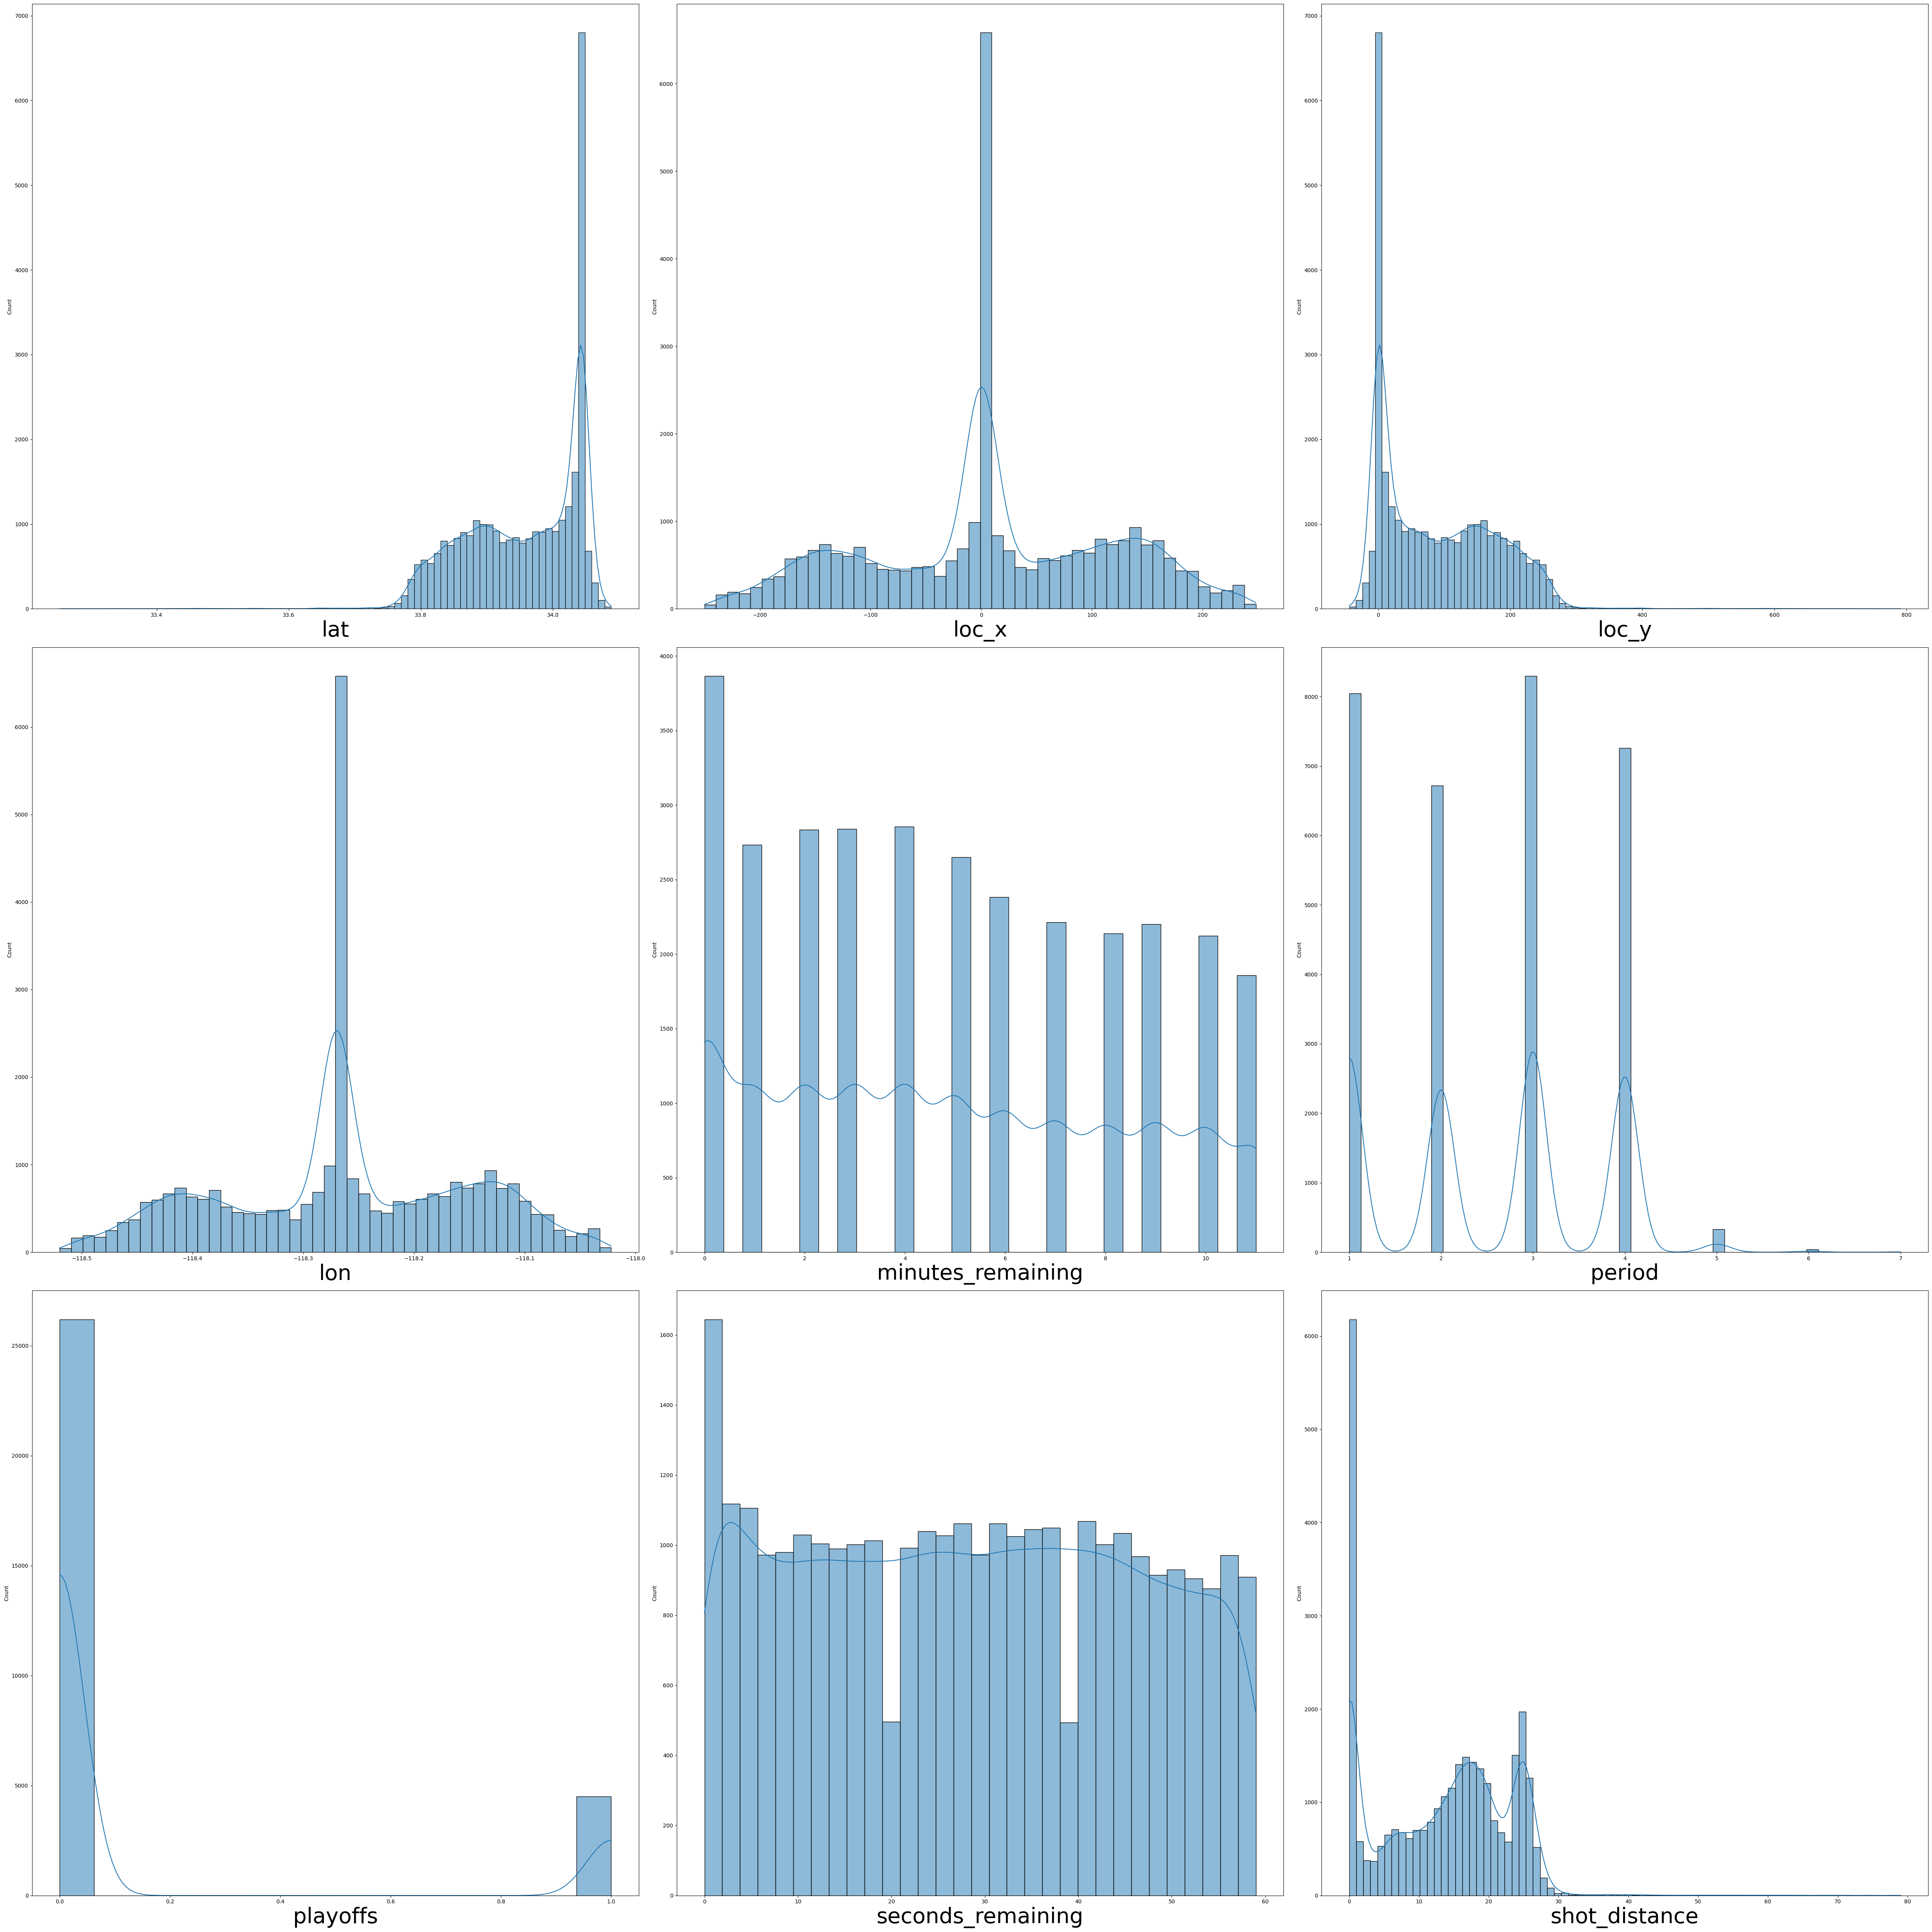

In [18]:
plt.figure(figsize=(50, 50), facecolor='white')#canvas size
plotnumber = 1#count variable

for columns in numerical_cols:#for loop to acess columns form data1
    if plotnumber<=16 :#checking whether count variable is less than 16 or not
        ax = plt.subplot(3, 3,plotnumber)#plotting 9 graphs in canvas(3 rows and 3 columns)
        sns.histplot(x=columns,data=numerical_cols #plotting count plot
                        ,kde=True)
        plt.xlabel(columns,fontsize=40)#assigning name to x-axis and increasing it's font
    plotnumber+=1#increasing counter
plt.tight_layout()

1. *last column* is having left skewed distribution
2. *loc_x column* is having normal distribution
3. *loc_y column* is having right skewed distribution
4. *lon column* is having normal distribution

In [19]:
cat_columns = data.select_dtypes(include=['object'])
cat_columns

action_type combined_shot_type   season       shot_type  \
0              Jump Shot          Jump Shot  2000-01  2PT Field Goal   
1              Jump Shot          Jump Shot  2000-01  2PT Field Goal   
2              Jump Shot          Jump Shot  2000-01  2PT Field Goal   
3              Jump Shot          Jump Shot  2000-01  2PT Field Goal   
4      Driving Dunk Shot               Dunk  2000-01  2PT Field Goal   
...                  ...                ...      ...             ...   
30692          Jump Shot          Jump Shot  1999-00  2PT Field Goal   
30693           Tip Shot           Tip Shot  1999-00  2PT Field Goal   
30694  Running Jump Shot          Jump Shot  1999-00  2PT Field Goal   
30695          Jump Shot          Jump Shot  1999-00  3PT Field Goal   
30696          Jump Shot          Jump Shot  1999-00  2PT Field Goal   

              shot_zone_area        shot_zone_basic  shot_zone_range  \
0              Right Side(R)              Mid-Range        16-24 ft.   
1               Left Side(L)              Mid-Range         8-16 ft.   
2       Left Side Center(LC)              Mid-Range        16-24 ft.   
3      Right Side Center(RC)              Mid-Range        16-24 ft.   
4                  Center(C)        Restricted Area  Less Than 8 ft.   
...                      ...                    ...              ...   
30692              Center(C)  In The Paint (Non-RA)  Less Than 8 ft.   
30693              Center(C)        Restricted Area  Less Than 8 ft.   
30694   Left Side Center(LC)              Mid-Range        16-24 ft.   
30695              Center(C)      Above the Break 3          24+ ft.   
30696              Center(C)  In The Paint (Non-RA)  Less Than 8 ft.   

                team_name   game_date      matchup opponent  
0      Los Angeles Lakers  2000-10-31    LAL @ POR      POR  
1      Los Angeles Lakers  2000-10-31    LAL @ POR      POR  
2      Los Angeles Lakers  2000-10-31    LAL @ POR      POR  
3      Los Angeles Lakers  2000-10-31    LAL @ POR      POR  
4      Los Angeles Lakers  2000-10-31    LAL @ POR      POR  
...                   ...         ...          ...      ...  
30692  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND  
30693  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND  
30694  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND  
30695  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND  
30696  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND  

[30697 rows x 11 columns]

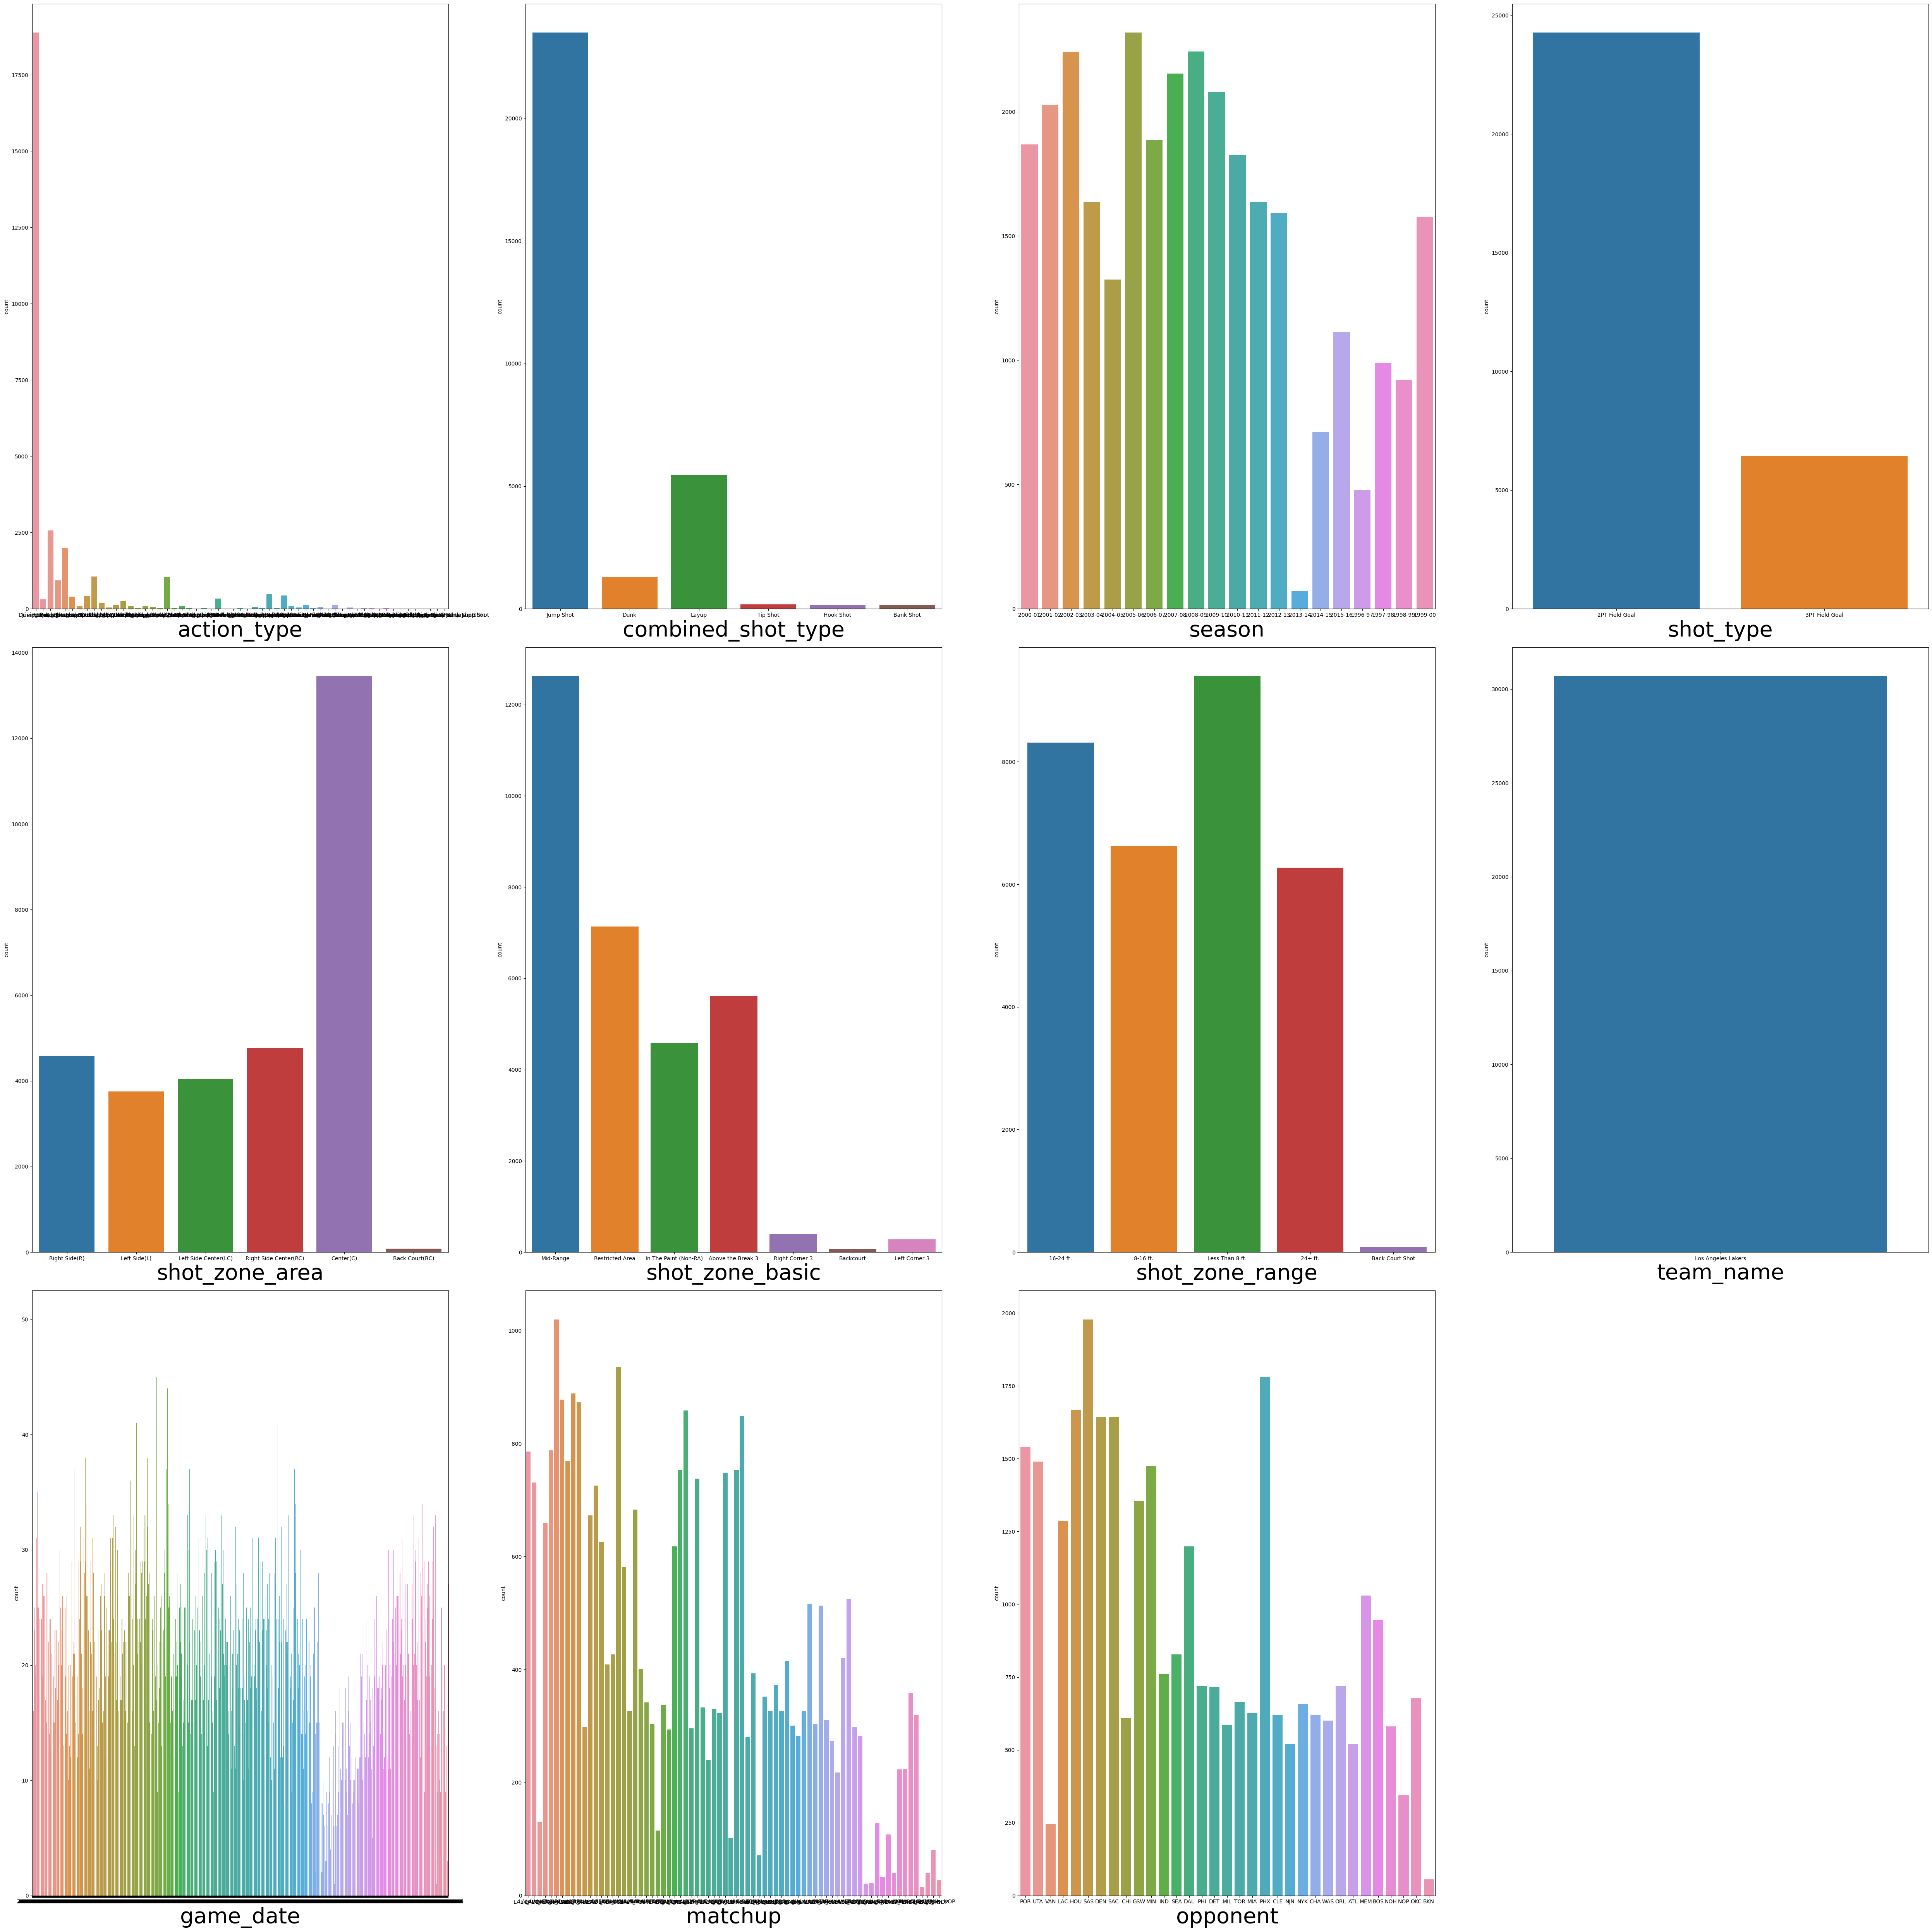

In [20]:
plt.figure(figsize=(50, 50), facecolor='white')#canvas size
plotnumber = 1#count variable

for columns in cat_columns:#for loop to acess columns form data1
    if plotnumber<=11 :#checking whether count variable is less than 16 or not
        ax = plt.subplot(3, 4,plotnumber)#plotting 11 graphs in canvas(3 rows and 4 columns)
        sns.countplot(x=columns,data=cat_columns) #plotting count plot
        plt.xlabel(columns,fontsize=40)#assigning name to x-axis and increasing it's font
    plotnumber+=1#increasing counter
plt.tight_layout()

1. In action_type there are more than 18000 times player used jump shot.

2. Player used more than 20000 times jump shot along with combination of other shot.
3. In 2013-14 player made very less attempts for basket

4. Player made 2PT Field Goal majorly.

5. The majority attempts for basket made by the player from the center shot_zone_area.

6. The majority attempts for basket made by the player from the Mid-Range shot_zone_basic.

7.  The majority attempts for basket made by the player less than 8ft.

8. Player played majority of games against SAS.

BIVARIATE ANALYSIS

In [21]:
data.isnull().sum()

action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
team_id                  0
team_name                0
game_date                0
matchup                  0
opponent                 0
shot_id                  0
dtype: int64

**shot_made_flag** is a **target column** and has having **5000** missing values.Since it is being a **target column** and we are not going to impute those missing values, So we are removing **5000** missing values.

In [22]:
data=data.dropna()

In [23]:
data.shape

(25697, 25)

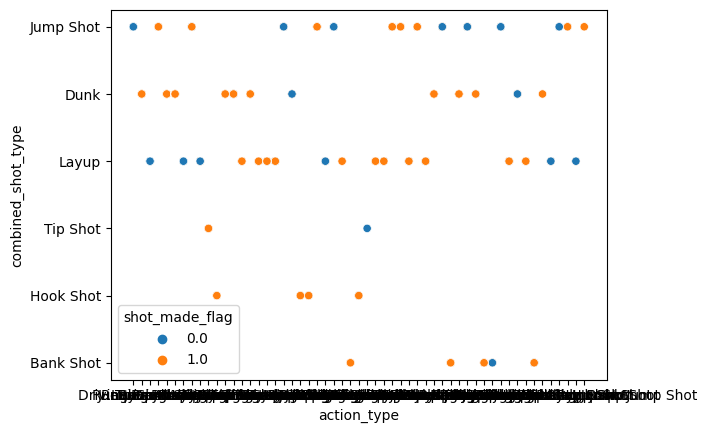

In [24]:
sns.scatterplot(x='action_type',y='combined_shot_type',hue='shot_made_flag',data=data)
plt.show()

1. If Hook shot is attempted then basket is made.

2. If Bank shot is attempted then their is a 80% of basket chance.

3. If Tip shot is attempted then their is a 50% chance of basket.

4. Majority Baskets are taken in Layup, Dunk and Jump shot.

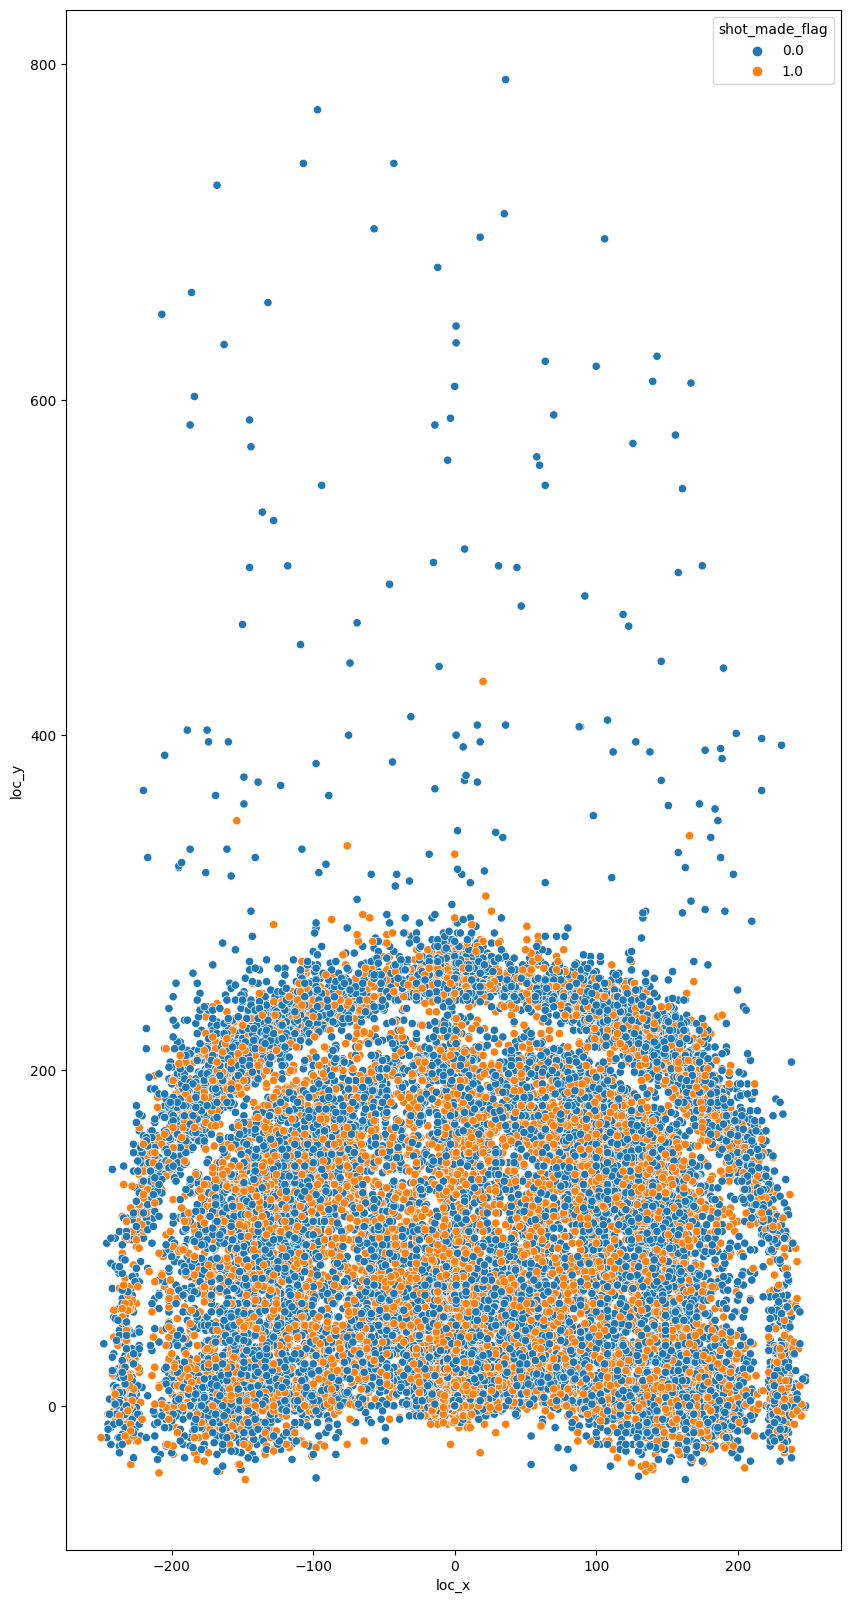

In [25]:
plt.figure(figsize=(10,20))
sns.scatterplot(x='loc_x',y='loc_y',hue='shot_made_flag',data=data)
plt.show()

<Axes: xlabel='lat', ylabel='lon'>

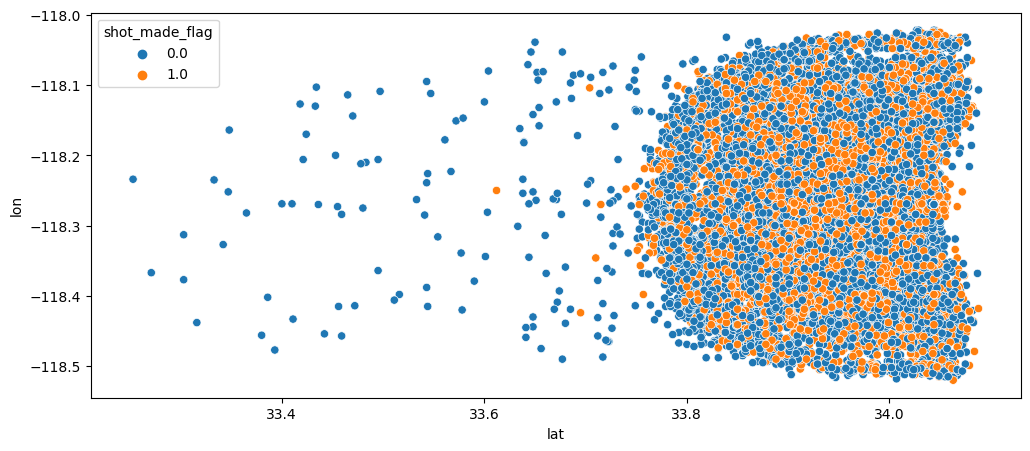

In [26]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='lat',y='lon',hue='shot_made_flag',data=data)

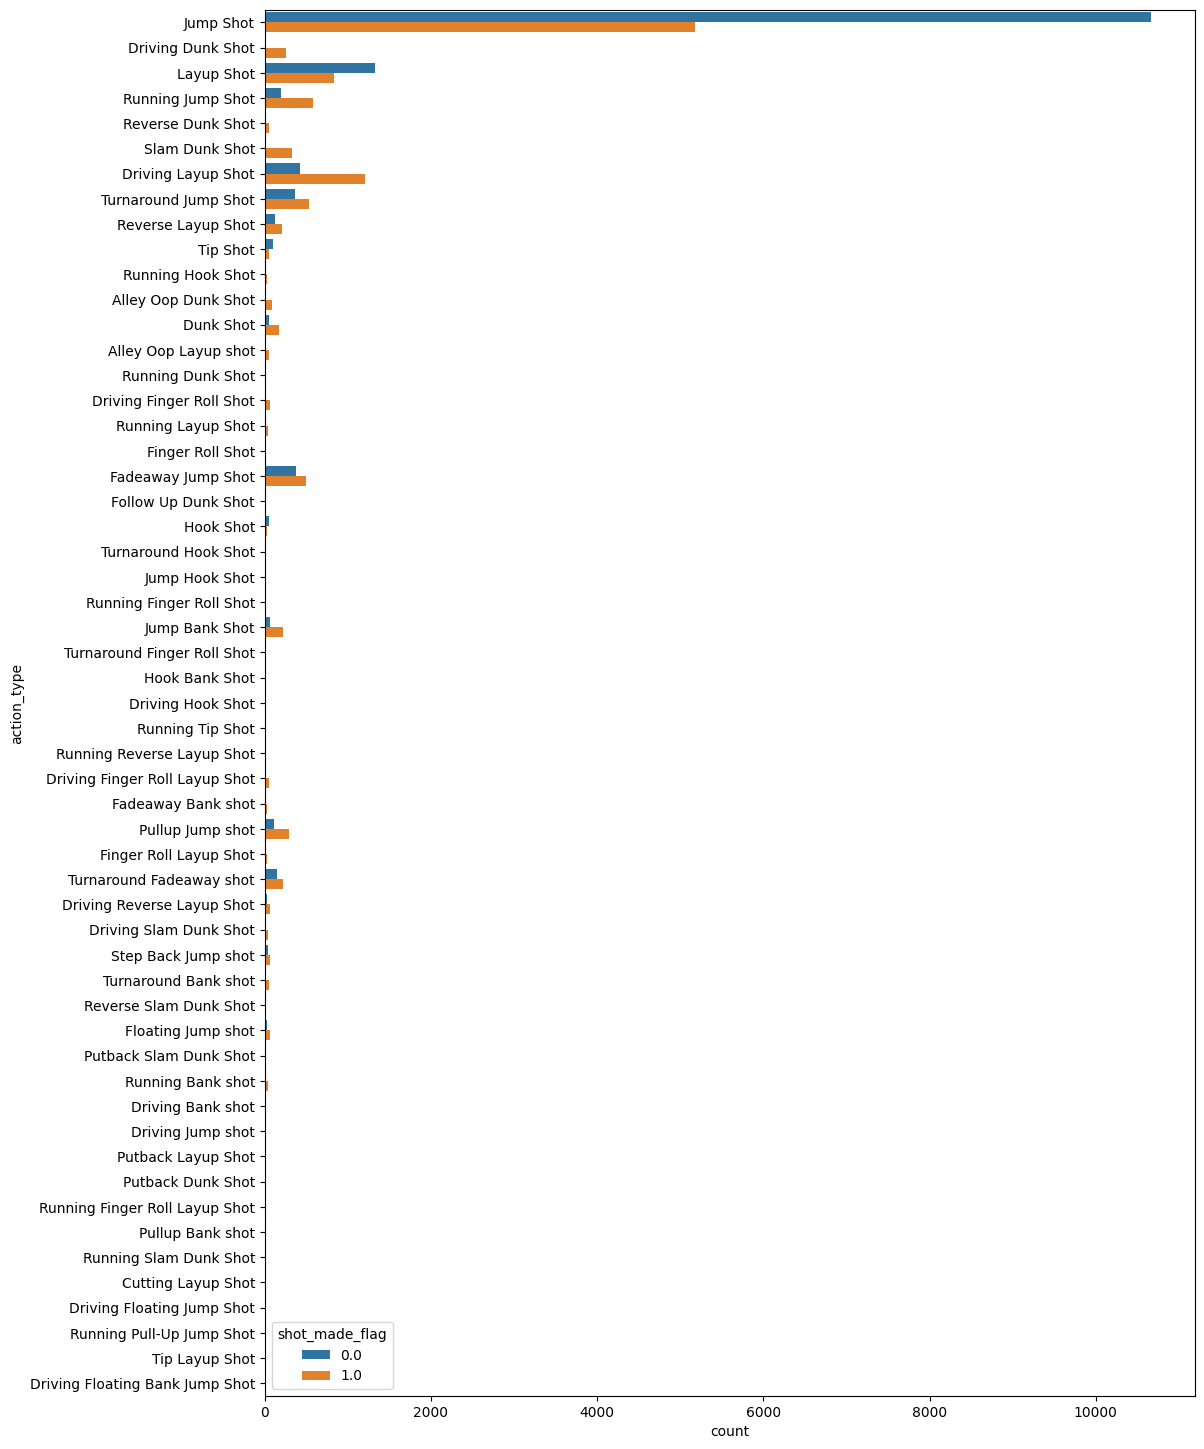

In [27]:
plt.figure(figsize=(12,18))
sns.countplot(y="action_type", hue="shot_made_flag", data=data)
plt.show()

The majority of shots are made by Jump Shot and the majority of baskets are made in Jump Shot(action_type).
The second highest baskets are made in Driving Layup Shot.
In Bank Shot and Dunk Shot very few attempts were made.


In [28]:
numerical_cols.columns

Index(['lat', 'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period',
       'playoffs', 'seconds_remaining', 'shot_distance'],
      dtype='object')

<Axes: xlabel='count', ylabel='shot_distance'>

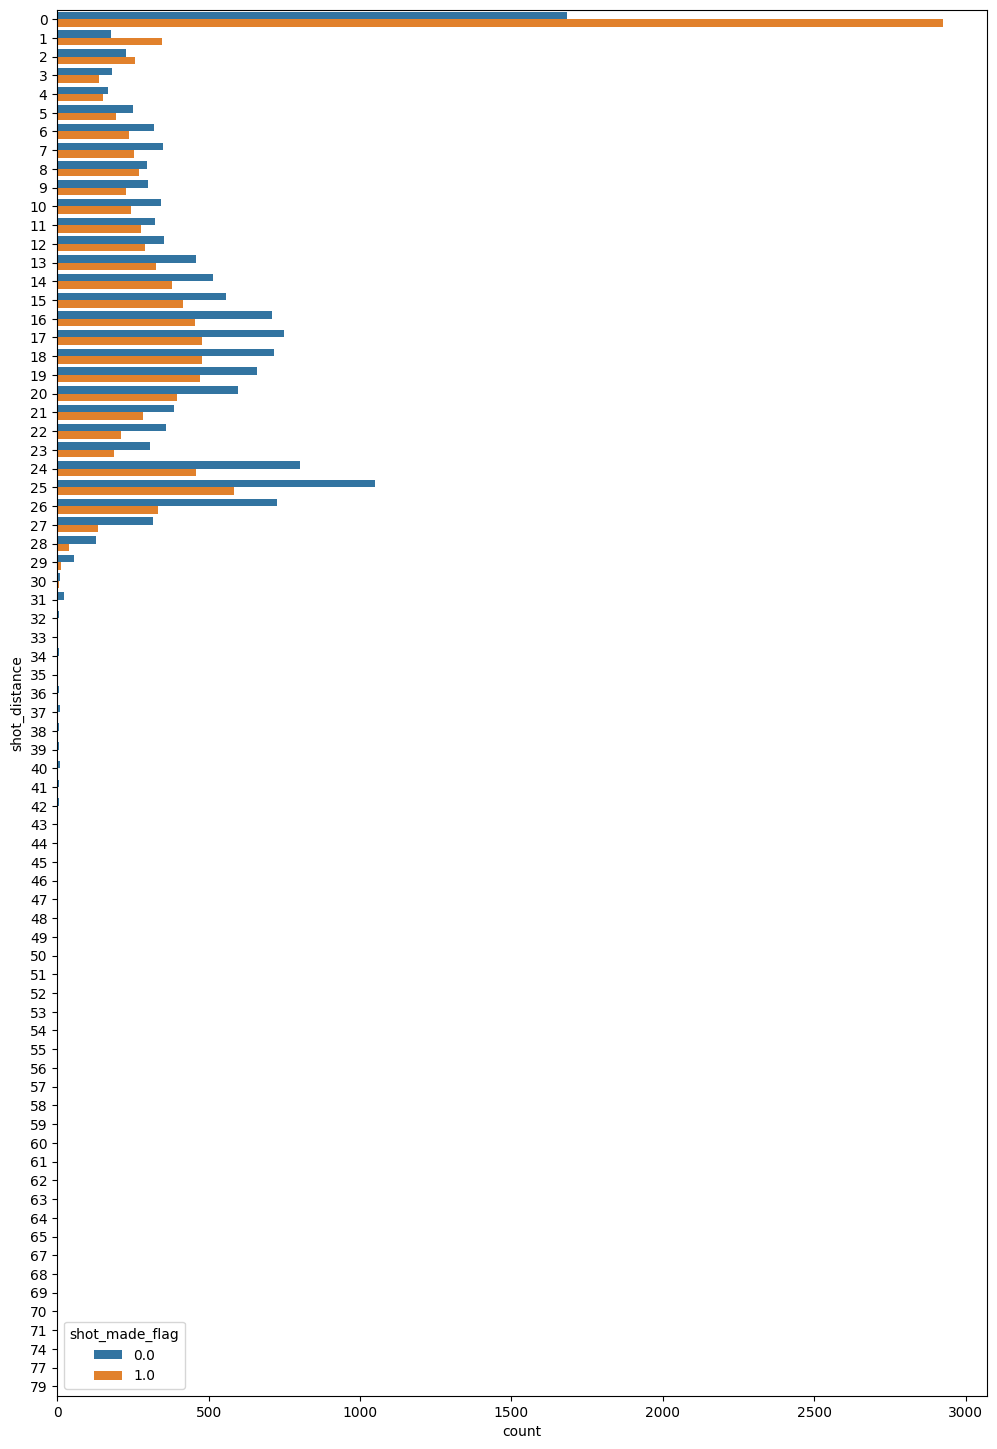

In [29]:
plt.figure(figsize=(12,18))
sns.countplot(y="shot_distance", hue="shot_made_flag", data=data)

If shot_distance is more than 30, then the player has made very less attempts.
If shot_distance is less than 1, then maximum attempts were made.
If shot_distance is 25,then second maximum attempts were made.
Around 95% shots were made if shot_ditance is less than 30.

In [30]:
data.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

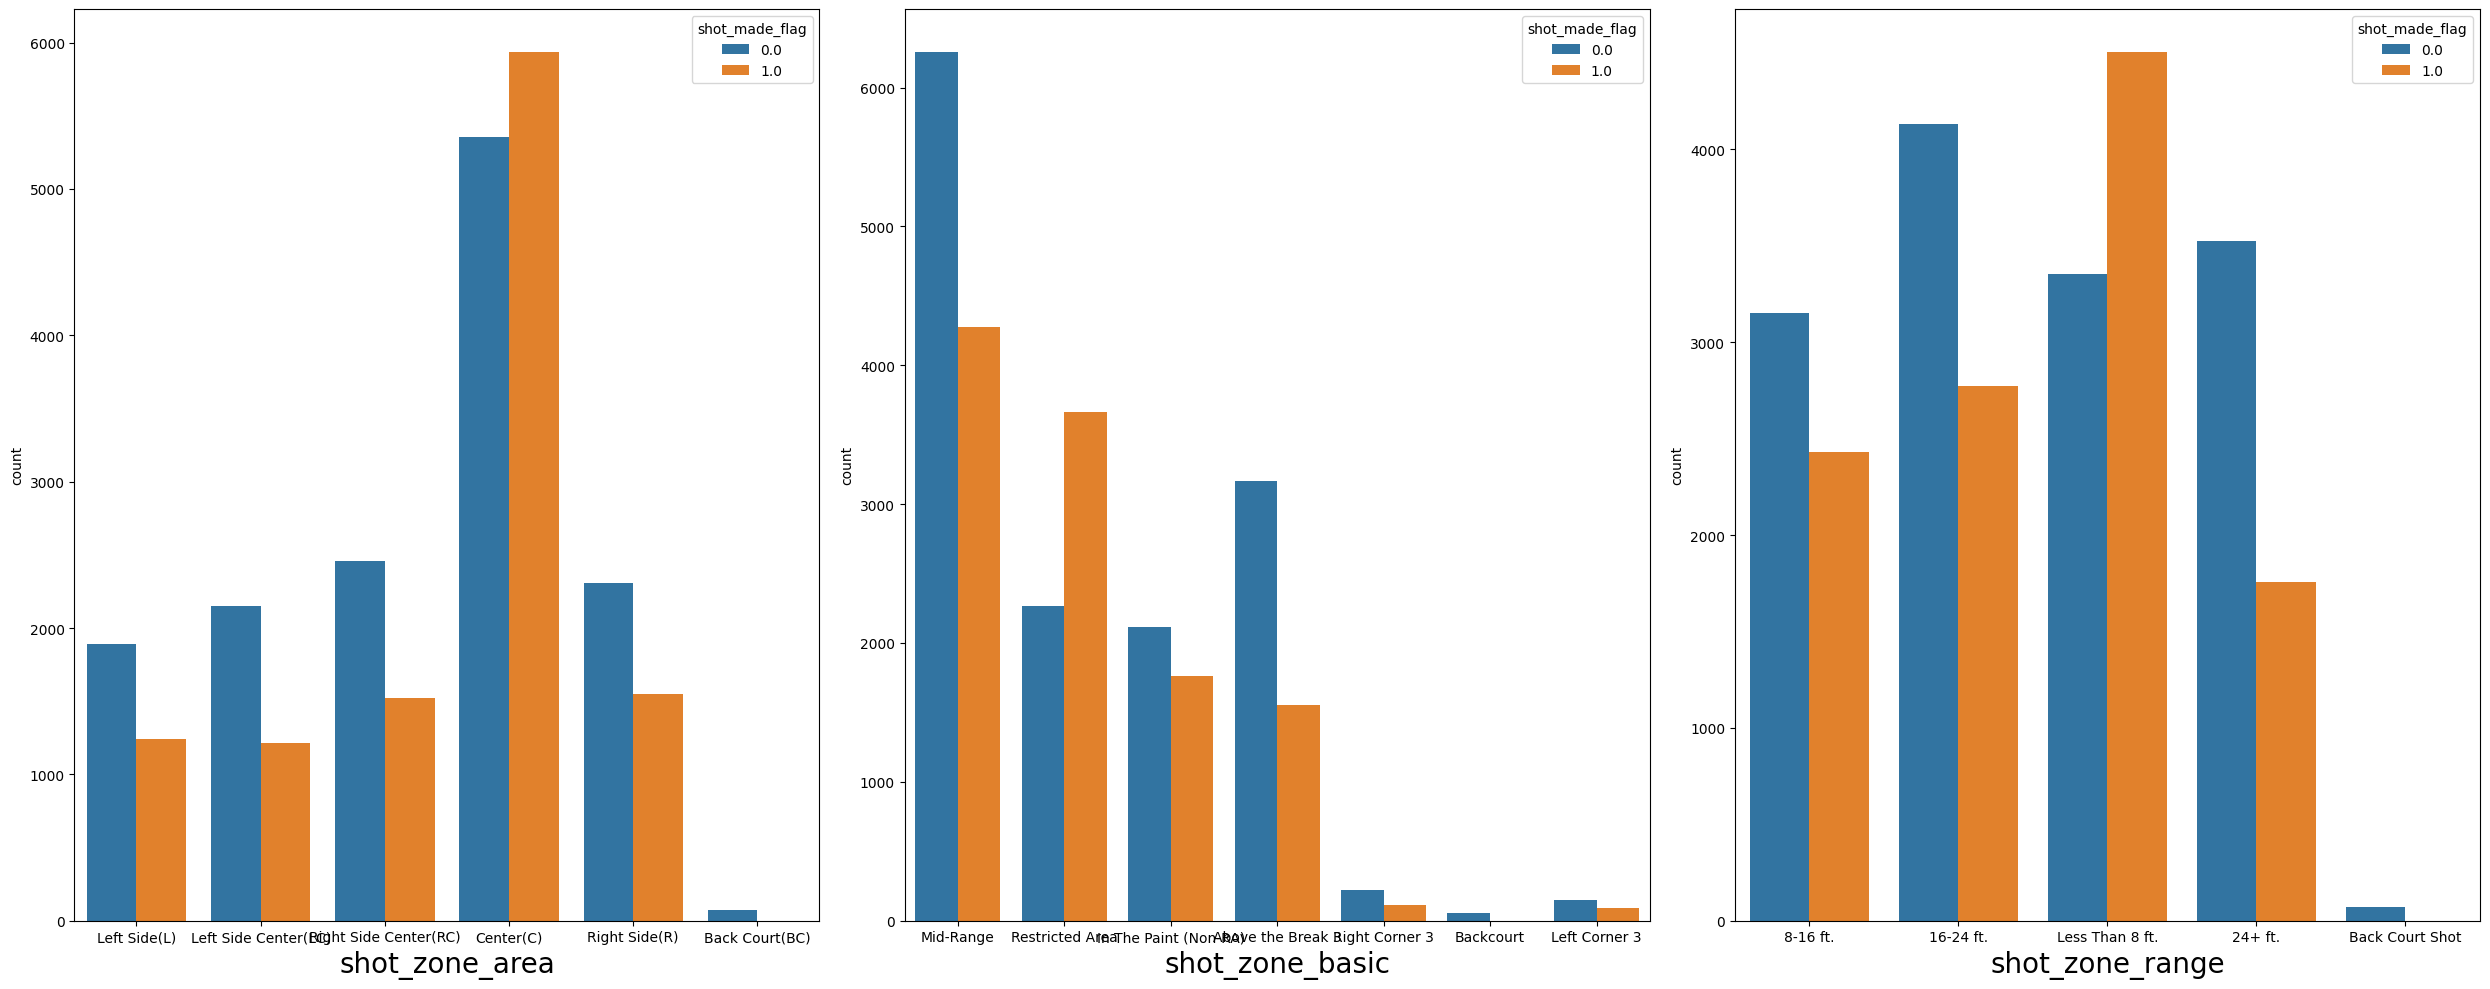

In [31]:
cat1_cols= data[['shot_zone_area', 'shot_zone_basic', 'shot_zone_range','shot_made_flag']]
plt.figure(figsize=(25, 10), facecolor='white')#canvas size
plotnumber = 1#count variable

for columns in cat1_cols:#for loop to acess columns form cat1_cols
    if plotnumber<=3 :#checking whether count variable is less than 11 or not
        ax = plt.subplot(1,3,plotnumber)#plotting 3 graphs in canvas(1 rows and 3 columns)
        sns.countplot(x=columns,data=cat1_cols,hue='shot_made_flag')
        plt.xlabel(columns,fontsize=20)#assigning name to x-axis and increasing it's font
        plotnumber+=1#increasing counter
plt.tight_layout()

## MULTIVARIATE ANALYSIS

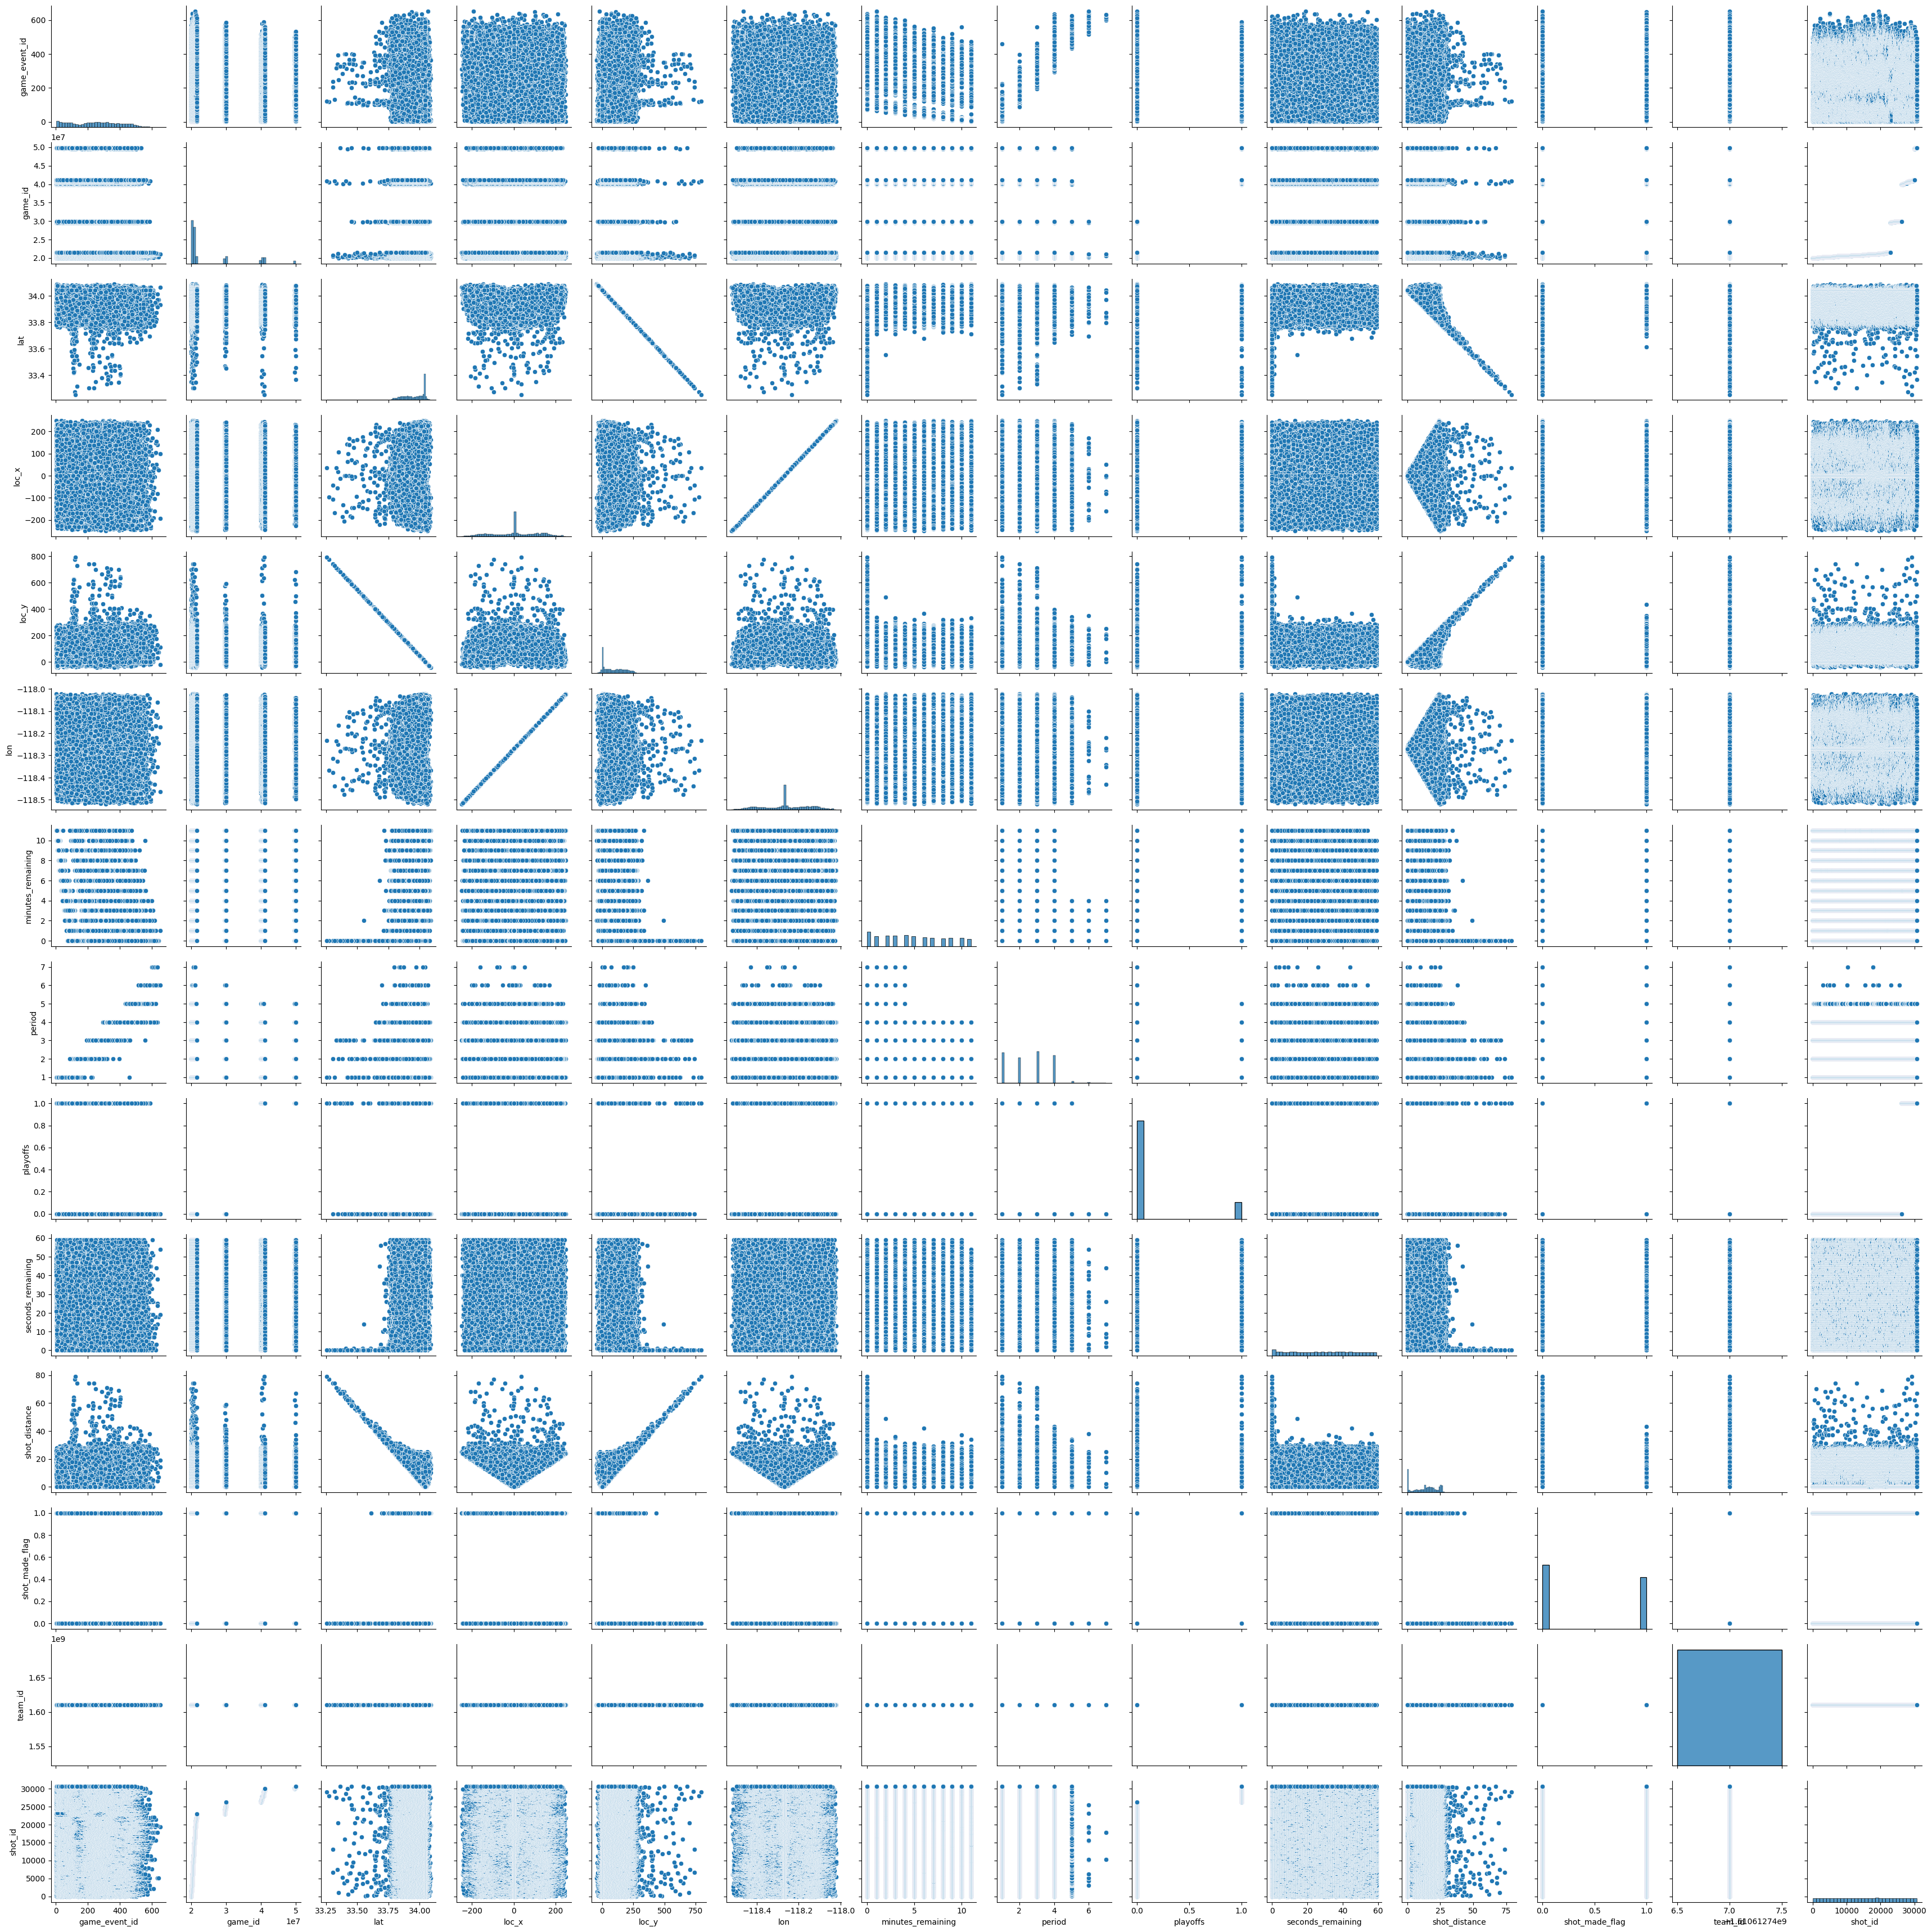

In [32]:
sns.pairplot(data)
plt.show()

<ipython-input-33-da393164474d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr(),annot=True)


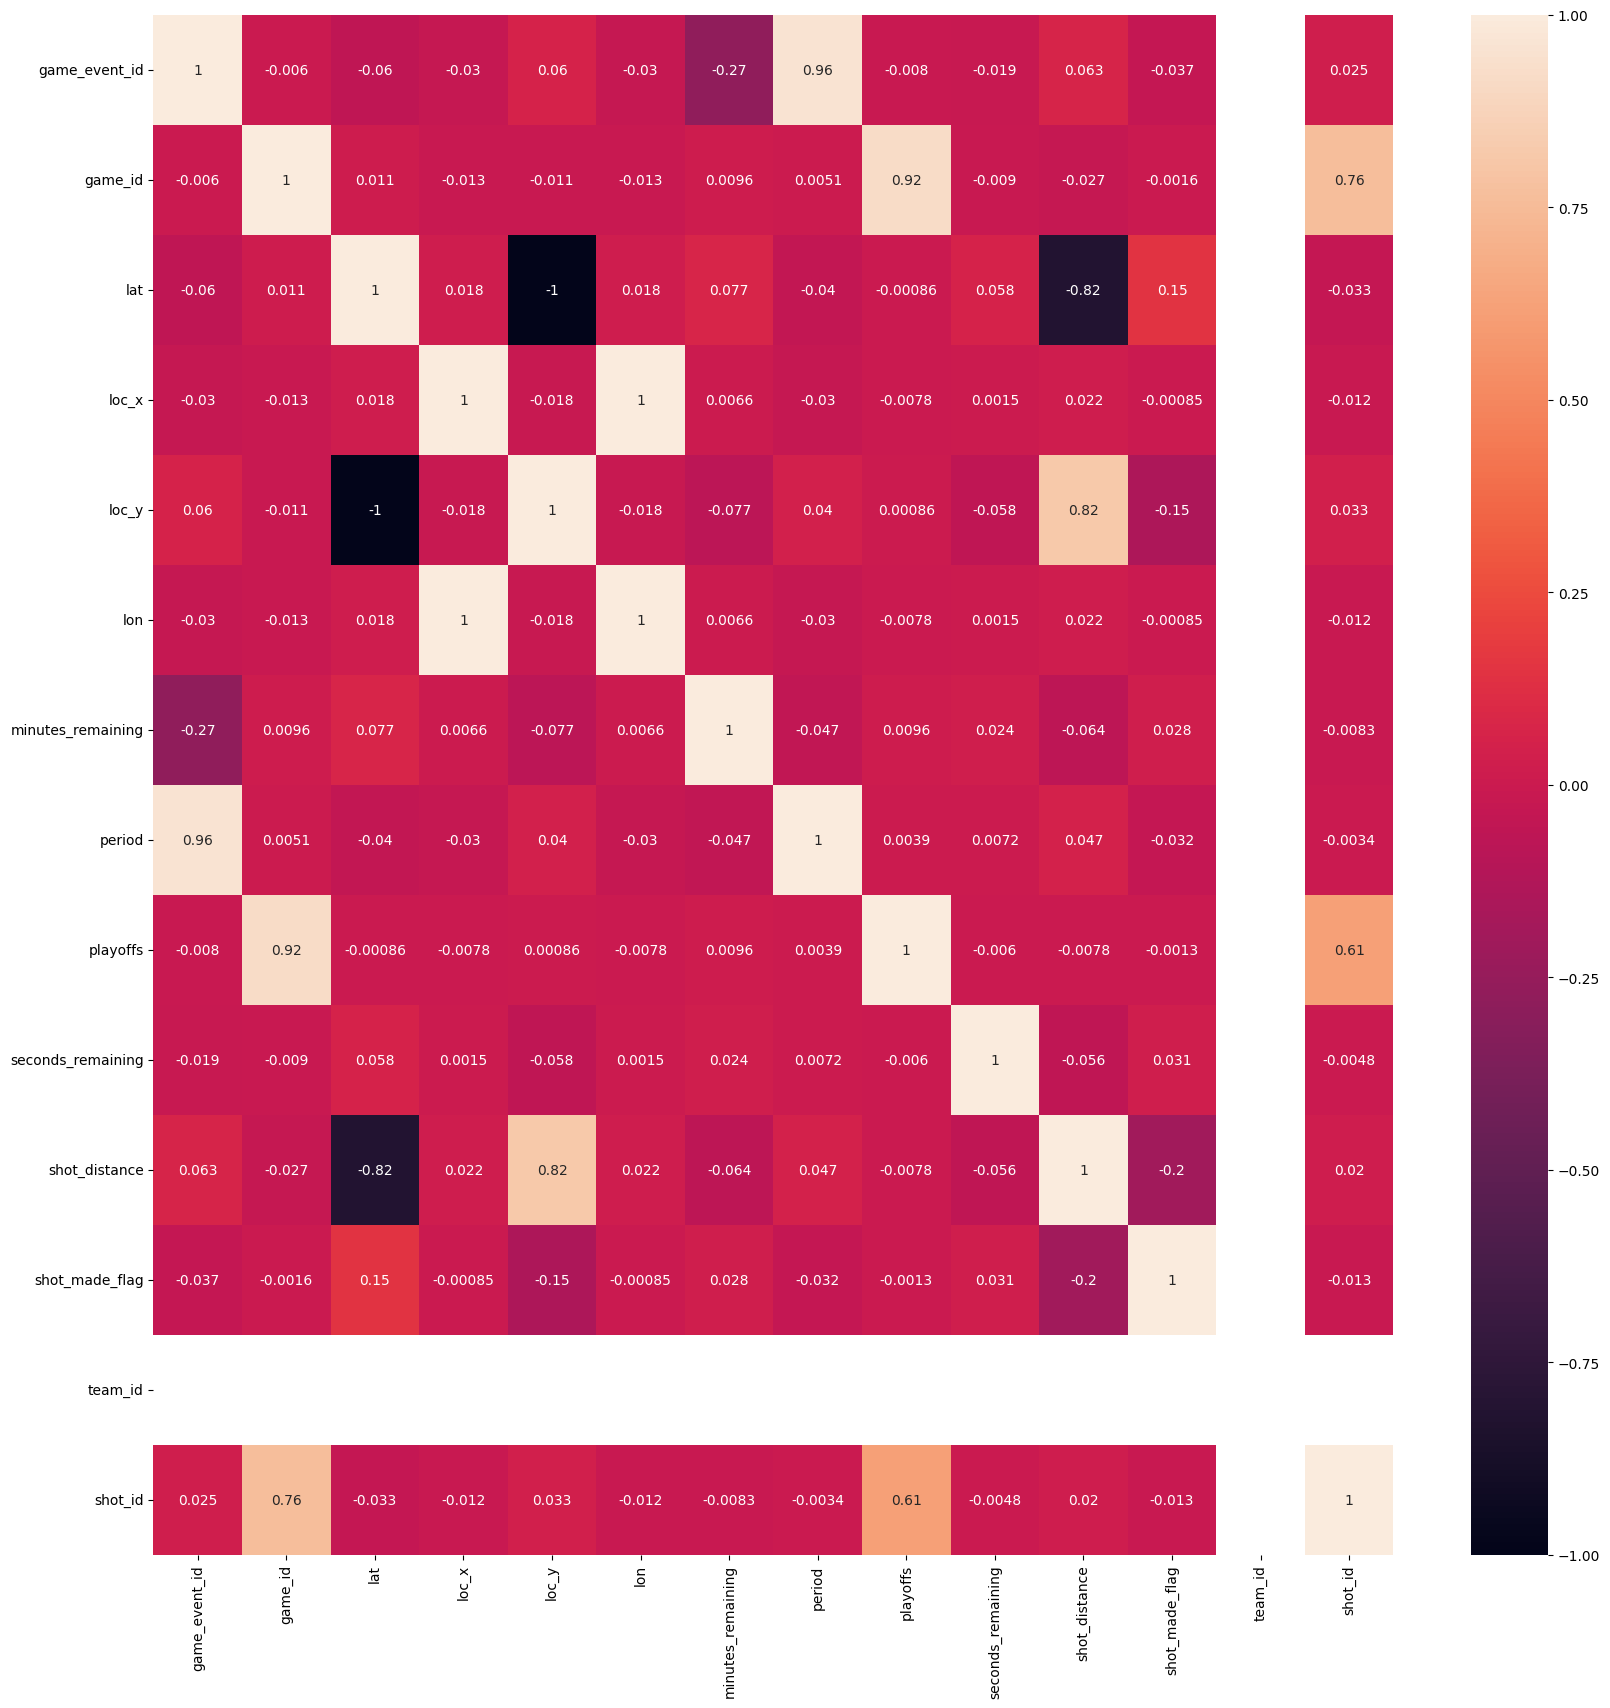

In [33]:
plt.figure(figsize=(20, 20), facecolor='white')
sns.heatmap(data=data.corr(),annot=True)
plt.show()

## DATA PREPROCESSING AND FEATURE ENGINEERING

HANDLING MISSING VALUES

In [34]:
data.isnull().sum()

action_type           0
combined_shot_type    0
game_event_id         0
game_id               0
lat                   0
loc_x                 0
loc_y                 0
lon                   0
minutes_remaining     0
period                0
playoffs              0
season                0
seconds_remaining     0
shot_distance         0
shot_made_flag        0
shot_type             0
shot_zone_area        0
shot_zone_basic       0
shot_zone_range       0
team_id               0
team_name             0
game_date             0
matchup               0
opponent              0
shot_id               0
dtype: int64

In [35]:
df= data.drop(['game_event_id','game_id','lat','lon','team_id','shot_id','season','team_name','game_date','matchup'],axis=1)#,inplace=True)
df.head()

action_type combined_shot_type  loc_x  loc_y  minutes_remaining  \
1          Jump Shot          Jump Shot   -157      0                 10   
2          Jump Shot          Jump Shot   -101    135                  7   
3          Jump Shot          Jump Shot    138    175                  6   
4  Driving Dunk Shot               Dunk      0      0                  6   
5          Jump Shot          Jump Shot   -145    -11                  9   

   period  playoffs  seconds_remaining  shot_distance  shot_made_flag  \
1       1         0                 22             15             0.0   
2       1         0                 45             16             1.0   
3       1         0                 52             22             0.0   
4       2         0                 19              0             1.0   
5       3         0                 32             14             0.0   

        shot_type         shot_zone_area  shot_zone_basic  shot_zone_range  \
1  2PT Field Goal           Left Side(L)        Mid-Range         8-16 ft.   
2  2PT Field Goal   Left Side Center(LC)        Mid-Range        16-24 ft.   
3  2PT Field Goal  Right Side Center(RC)        Mid-Range        16-24 ft.   
4  2PT Field Goal              Center(C)  Restricted Area  Less Than 8 ft.   
5  2PT Field Goal           Left Side(L)        Mid-Range         8-16 ft.   

  opponent  
1      POR  
2      POR  
3      POR  
4      POR  
5      POR

## ENCODING

#### LABEL ENCODING

In [36]:
df.head(10)

action_type combined_shot_type  loc_x  loc_y  minutes_remaining  \
1           Jump Shot          Jump Shot   -157      0                 10   
2           Jump Shot          Jump Shot   -101    135                  7   
3           Jump Shot          Jump Shot    138    175                  6   
4   Driving Dunk Shot               Dunk      0      0                  6   
5           Jump Shot          Jump Shot   -145    -11                  9   
6          Layup Shot              Layup      0      0                  8   
8           Jump Shot          Jump Shot    -65    108                  6   
9   Running Jump Shot          Jump Shot    -33    125                  3   
10          Jump Shot          Jump Shot    -94    238                  1   
11          Jump Shot          Jump Shot    121    127                 11   

    period  playoffs  seconds_remaining  shot_distance  shot_made_flag  \
1        1         0                 22             15             0.0   
2        1         0                 45             16             1.0   
3        1         0                 52             22             0.0   
4        2         0                 19              0             1.0   
5        3         0                 32             14             0.0   
6        3         0                 52              0             1.0   
8        3         0                 12             12             1.0   
9        3         0                 36             12             0.0   
10       3         0                 56             25             0.0   
11       1         0                  0             17             1.0   

         shot_type         shot_zone_area        shot_zone_basic  \
1   2PT Field Goal           Left Side(L)              Mid-Range   
2   2PT Field Goal   Left Side Center(LC)              Mid-Range   
3   2PT Field Goal  Right Side Center(RC)              Mid-Range   
4   2PT Field Goal              Center(C)        Restricted Area   
5   2PT Field Goal           Left Side(L)              Mid-Range   
6   2PT Field Goal              Center(C)        Restricted Area   
8   2PT Field Goal           Left Side(L)  In The Paint (Non-RA)   
9   2PT Field Goal              Center(C)  In The Paint (Non-RA)   
10  3PT Field Goal   Left Side Center(LC)      Above the Break 3   
11  2PT Field Goal  Right Side Center(RC)              Mid-Range   

    shot_zone_range opponent  
1          8-16 ft.      POR  
2         16-24 ft.      POR  
3         16-24 ft.      POR  
4   Less Than 8 ft.      POR  
5          8-16 ft.      POR  
6   Less Than 8 ft.      POR  
8          8-16 ft.      POR  
9          8-16 ft.      POR  
10          24+ ft.      POR  
11        16-24 ft.      UTA

In [37]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
df.shot_type=lc.fit_transform(df.shot_type)
df.shot_zone_range=lc.fit_transform(df.shot_zone_range)

ONE HOT ENCODING

In [38]:
df=pd.get_dummies(data=df,drop_first=True)
df.head()

loc_x  loc_y  minutes_remaining  period  playoffs  seconds_remaining  \
1   -157      0                 10       1         0                 22   
2   -101    135                  7       1         0                 45   
3    138    175                  6       1         0                 52   
4      0      0                  6       2         0                 19   
5   -145    -11                  9       3         0                 32   

   shot_distance  shot_made_flag  shot_type  shot_zone_range  \
1             15             0.0          0                2   
2             16             1.0          0                0   
3             22             0.0          0                0   
4              0             1.0          0                4   
5             14             0.0          0                2   

   action_type_Alley Oop Layup shot  action_type_Cutting Layup Shot  \
1                                 0                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   
5                                 0                               0   

   action_type_Driving Bank shot  action_type_Driving Dunk Shot  \
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              1   
5                              0                              0   

   action_type_Driving Finger Roll Layup Shot  \
1                                           0   
2                                           0   
3                                           0   
4                                           0   
5                                           0   

   action_type_Driving Finger Roll Shot  \
1                                     0   
2                                     0   
3                                     0   
4                                     0   
5                                     0   

   action_type_Driving Floating Bank Jump Shot  \
1                                            0   
2                                            0   
3                                            0   
4                                            0   
5                                            0   

   action_type_Driving Floating Jump Shot  action_type_Driving Hook Shot  \
1                                       0                              0   
2                                       0                              0   
3                                       0                              0   
4                                       0                              0   
5                                       0                              0   

   action_type_Driving Jump shot  action_type_Driving Layup Shot  \
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              0                               0   
5                              0                               0   

   action_type_Driving Reverse Layup Shot  action_type_Driving Slam Dunk Shot  \
1                                       0                                   0   
2                                       0                                   0   
3                                       0                                   0   
4                                       0                                   0   
5                                       0                                   0   

   action_type_Dunk Shot  action_type_Fadeaway Bank shot  \
1                      0                               0   
2        

In [39]:
df.shape

(25697, 112)

## MODEL CREATION

In [40]:
X=df.drop(['shot_made_flag'],axis=1)
y=df.shot_made_flag

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=33)

In [42]:
y.value_counts()

0.0    14232
1.0    11465
Name: shot_made_flag, dtype: int64

## BALANCING THE DATA

In [43]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [44]:
X_sm, y_sm = sm.fit_resample(X_train,y_train)

Actual Classes Counter({0.0: 10736, 1.0: 8536})
SMOTE Classes Counter({1.0: 10736, 0.0: 10736})


<Axes: xlabel='shot_made_flag', ylabel='Count'>

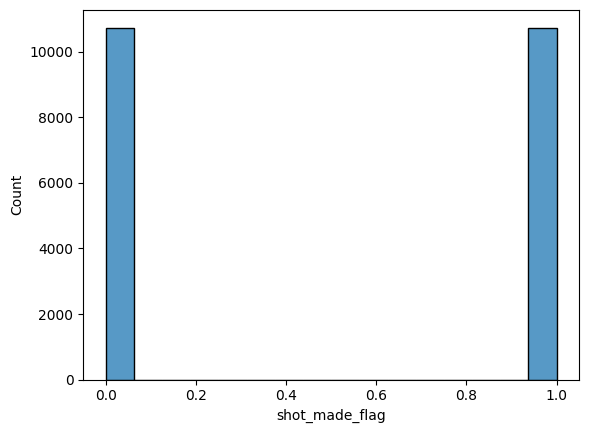

In [45]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_sm))
sns.histplot(y_sm)

## LOGISTIC REGRESSION

In [46]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_sm,y_sm)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
y_pred=clf.predict(X_test)
y_pred

array([0., 0., 0., ..., 1., 0., 1.])

In [48]:

from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,\
precision_score,classification_report,f1_score

In [49]:
pd.crosstab(y_test,y_pred)

col_0            0.0   1.0
shot_made_flag            
0.0             2710   786
1.0             1400  1529

In [50]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.66      0.78      0.71      3496
         1.0       0.66      0.52      0.58      2929

    accuracy                           0.66      6425
   macro avg       0.66      0.65      0.65      6425
weighted avg       0.66      0.66      0.65      6425



In [51]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree

dt=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf= 1, min_samples_split= 3, splitter= 'random')#object creation for decision tree
dt.fit(X_sm,y_sm)#training the model
y_hat=dt.predict(X_test)
y_hat

array([0., 0., 0., ..., 0., 0., 1.])

In [52]:
cr2=classification_report(y_test,y_hat)
print(cr2)

              precision    recall  f1-score   support

         0.0       0.65      0.85      0.74      3496
         1.0       0.72      0.45      0.56      2929

    accuracy                           0.67      6425
   macro avg       0.68      0.65      0.65      6425
weighted avg       0.68      0.67      0.65      6425



## **XGB BOOST**

In [67]:
import xgboost as xgb
clf = xgb.XGBClassifier(n_estimators=10000)
eval_set  = [(X_train,y_train), (X_test,y_test)]

clf.fit(X_sm, y_sm, eval_set=eval_set,
        eval_metric="auc", early_stopping_rounds=30)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.70713	validation_1-auc:0.68933
[1]	validation_0-auc:0.71796	validation_1-auc:0.68884
[2]	validation_0-auc:0.72405	validation_1-auc:0.69177
[3]	validation_0-auc:0.72756	validation_1-auc:0.69425
[4]	validation_0-auc:0.72991	validation_1-auc:0.69491
[5]	validation_0-auc:0.73182	validation_1-auc:0.69493
[6]	validation_0-auc:0.73596	validation_1-auc:0.69603
[7]	validation_0-auc:0.73946	validation_1-auc:0.69629
[8]	validation_0-auc:0.74295	validation_1-auc:0.69475
[9]	validation_0-auc:0.74529	validation_1-auc:0.69445
[10]	validation_0-auc:0.74687	validation_1-auc:0.69293
[11]	validation_0-auc:0.75025	validation_1-auc:0.69243
[12]	validation_0-auc:0.75196	validation_1-auc:0.69181
[13]	validation_0-auc:0.75342	validation_1-auc:0.69117
[14]	validation_0-auc:0.75511	validation_1-auc:0.68974
[15]	validation_0-auc:0.75848	validation_1-auc:0.68989
[16]	validation_0-auc:0.76192	validation_1-auc:0.69010
[17]	validation_0-auc:0.76396	validation_1-auc:0.69043
[18]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [68]:
from xgboost import XGBClassifier

xgb_c= XGBClassifier() ## object creation
xgb_c.fit(X_sm,y_sm)# fitting the data
y_hat_xg=xgb_c.predict(X_test)

In [73]:

cr3=classification_report(y_test,y_hat_xg)
print(cr3)

              precision    recall  f1-score   support

         0.0       0.64      0.73      0.68      3496
         1.0       0.62      0.51      0.56      2929

    accuracy                           0.63      6425
   macro avg       0.63      0.62      0.62      6425
weighted avg       0.63      0.63      0.63      6425



In [75]:
from sklearn.model_selection import RandomizedSearchCV
params = {'max_depth': [3, 6, 10, 15],
              'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
              'subsample': np.arange(0.5, 1.0, 0.1),
              'colsample_bytree': np.arange(0.5, 1.0, 0.1),
              'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
              'n_estimators': [100, 250, 500, 750],
              'num_class': [10]
              }

xgbclf = xgb.XGBClassifier(objective="multi:softmax", tree_method='hist')
clf = RandomizedSearchCV(estimator=xgbclf,
                             param_distributions=params,
                             scoring='accuracy',
                             n_iter=25,
                             n_jobs=4,
                             verbose=1)
clf.fit(X_sm, y_sm)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           objective='multi:softmax',
                                           predictor=None, ...),
                   n_iter=25, n_jobs=4,
                   param_distributions={'colsample_bylevel': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3,
                                                          0.4],
                                        'max_depth': [3, 6, 10, 15],
                                        'n_estimators': [100, 250, 500, 750],
                                        'num_class': [10],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   scoring='accuracy', verbose=1)

In [76]:
clf_best_params = clf.best_params_                          ##it will give you best parameters
print(f"Best paramters: {clf_best_params})")

Best paramters: {'subsample': 0.6, 'num_class': 10, 'n_estimators': 250, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.5})


In [ ]:
print(classification_report(y_test,y_predict))

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.66      0.80      0.72      3496
         1.0       0.68      0.50      0.57      2929

    accuracy                           0.66      6425
   macro avg       0.67      0.65      0.65      6425
weighted avg       0.67      0.66      0.65      6425

